In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'INTG',
    'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH',
    'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PANW', 'PAYC', 'PINS', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO',
    'TWTR', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN', 'ZM']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

64

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-07-30', datetime.date(2022, 7, 30))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  67 of 67 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADBE
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...ASML
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...DDOG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...OKTA
   ...OPEN
   ...PANW
   ...PAYC
   ...PINS
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...VLD
   ...XPEV
   ...ZEN
   ...ZM
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2512   2022-07-25
2513   2022-07-26
2514   2022-07-27
2515   2022-07-28
2516   2022-07-29
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.995683
2       0.997100
3       0.992496
4       1.019040
5       1.002329
          ...   
2512    1.001315
2513    0.988457
2514    1.026156
2515    1.012133
2516    1.014208
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,0.998489
2,0.997179
3,1.003434
4,1.039713
5,1.010929
...,...
2512,1.000658
2513,0.991334
2514,1.069894
2515,1.026982


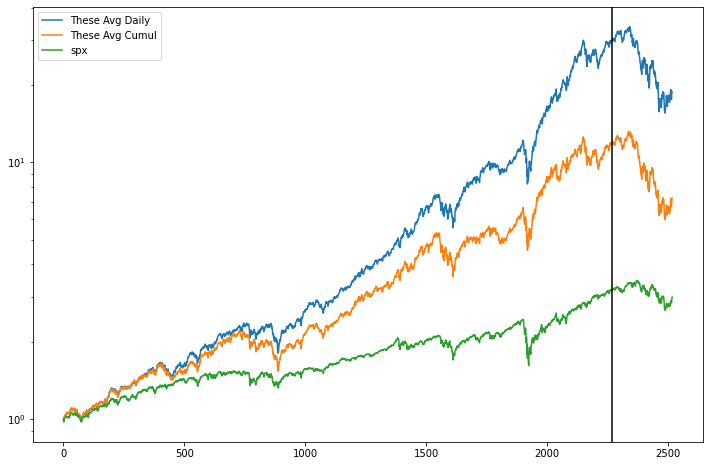

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-07-30,NaN,NaN
1,2012-07-31,0.989842,0.989842
2,2012-08-01,0.974175,0.974458
3,2012-08-02,0.978819,0.978919
4,2012-08-03,1.013019,1.012554


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-07-25,18.256553,6.926070
2513,2022-07-26,17.588238,6.712307
2514,2022-07-27,18.443690,7.045198
2515,2022-07-28,18.698591,7.176911
2516,2022-07-29,18.800436,7.241719


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

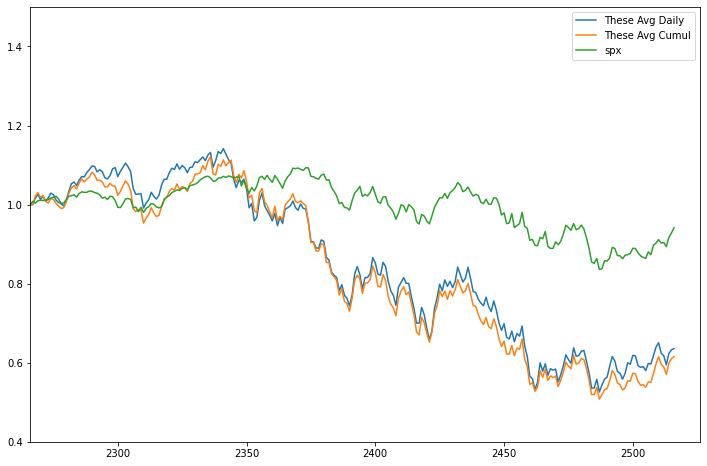

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1316,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1317,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1318,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1319,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1320,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1316,16.26,16.26,16.990,14.00
1317,15.26,15.26,16.399,15.12
1318,15.24,15.24,15.860,14.77
1319,13.73,13.73,15.430,13.62
1320,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1316,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1317,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1318,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1319,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1320,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.987645
Name: HighMult, dtype: float64


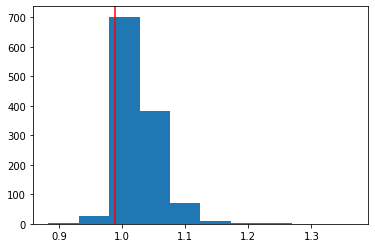

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0159085050934633


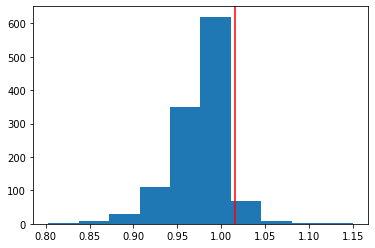

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0159085050934633, 0.9876447116765555)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0082656309731297, 0.9940764553692383)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1316,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1317,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1318,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1319,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1320,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.011902325423958, 0.9873134787898323, 1.0177439618628619, 0.9880190723630928)

In [27]:
get_hilo_mults(aapl)

(1.0064753180543797,
 0.9955401271705285,
 1.0096450768498901,
 0.9922922994683565)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006475,0.995540,1.009645,0.992292
1,ABMD,1.003950,0.997218,1.005043,0.996760
2,ABNB,1.009481,0.993753,1.012635,0.981947
3,ADBE,1.005002,0.995810,1.007106,0.994744
4,ADYEY,1.024808,0.980517,1.028975,0.966381


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,162.509995,AAPL
ABMD,293.01001,ABMD
ABNB,110.980003,ABNB
ADBE,410.119995,ADBE
ADYEY,18.02,ADYEY
...,...,...
ZEN,75.419998,ZEN
ZM,103.860001,ZM
^GSPC,4130.290039,^GSPC
^IXIC,12390.69043,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006475,0.995540,1.009645,0.992292,162.509995
1,ABMD,1.003950,0.997218,1.005043,0.996760,293.01001
2,ABNB,1.009481,0.993753,1.012635,0.981947,110.980003
3,ADBE,1.005002,0.995810,1.007106,0.994744,410.119995
4,ADYEY,1.024808,0.980517,1.028975,0.966381,18.02


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv